In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # module for plotting
import seaborn as sns
import sklearn as sklearn
from sklearn import linear_model, cross_validation, metrics, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation  import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import sem
import statsmodels.api as sm
import itertools

#############################
### Matplotlib
import matplotlib.pyplot as plt # module for plotting 
from matplotlib import interactive, font_manager
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])
dark2_cmap=ListedColormap(dark2_colors)

%matplotlib inline

In [22]:
data=pd.read_csv('C:/Users/gdeko/OneDrive/COMP5318 Machine Learning/4. Assignment 2/Data/DelayedFlights.csv').dropna()

In [23]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1247486.0,3.319515e+06,2.079531e+06,4.0,1484624.25,3224052.0,4921396.25,7009718.0
Year,1247486.0,2.008000e+03,0.000000e+00,2008.0,2008.00,2008.0,2008.00,2008.0
Month,1247486.0,6.065399e+00,3.508937e+00,1.0,3.00,6.0,9.00,12.0
DayofMonth,1247486.0,1.572542e+01,8.793008e+00,1.0,8.00,16.0,23.00,31.0
DayOfWeek,1247486.0,3.980082e+00,1.993270e+00,1.0,2.00,4.0,6.00,7.0
DepTime,1247486.0,1.558832e+03,4.543300e+02,1.0,1232.00,1618.0,1924.00,2400.0
CRSDepTime,1247486.0,1.487949e+03,4.211782e+02,0.0,1150.00,1529.0,1830.00,2359.0
ArrTime,1247486.0,1.616749e+03,5.839416e+02,1.0,1326.00,1737.0,2048.00,2400.0
CRSArrTime,1247486.0,1.652458e+03,4.617372e+02,0.0,1340.00,1722.0,2022.00,2359.0
FlightNum,1247486.0,2.276526e+03,1.997547e+03,1.0,637.00,1589.0,3676.00,9741.0


In [25]:
# Check for NULL Values
data.isnull().any()

#Calculate missing in each column
def missing_values_table(data): 
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum()/len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 
x=missing_values_table(data)
print(x)

                   Missing Values  % of Total Values
Unnamed: 0                      0                0.0
Year                            0                0.0
Month                           0                0.0
DayofMonth                      0                0.0
DayOfWeek                       0                0.0
DepTime                         0                0.0
CRSDepTime                      0                0.0
ArrTime                         0                0.0
CRSArrTime                      0                0.0
UniqueCarrier                   0                0.0
FlightNum                       0                0.0
TailNum                         0                0.0
ActualElapsedTime               0                0.0
CRSElapsedTime                  0                0.0
AirTime                         0                0.0
ArrDelay                        0                0.0
DepDelay                        0                0.0
Origin                          0             

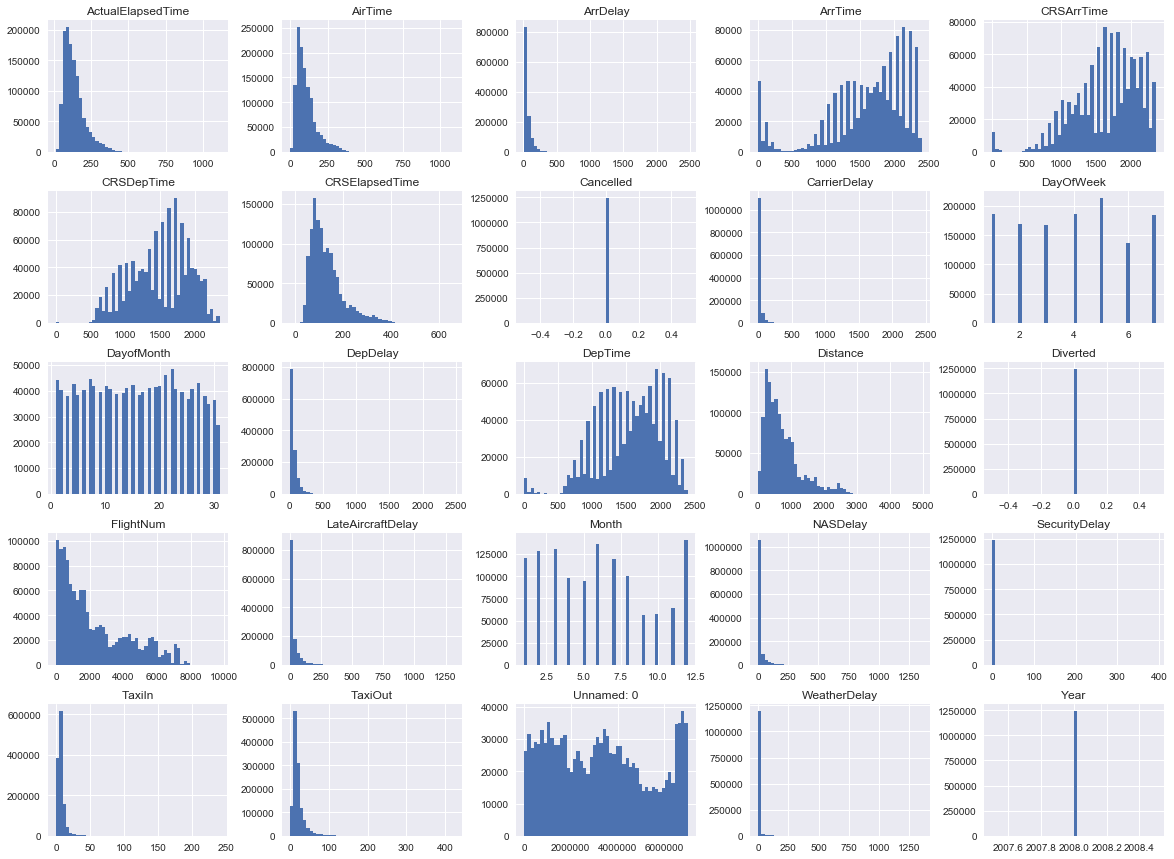

In [26]:
%matplotlib inline   
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

#Create histograms to get a feel of the data


(array([  5.71908000e+05,   2.61011000e+05,   1.52130000e+05,
          8.89560000e+04,   5.86460000e+04,   3.69660000e+04,
          2.52500000e+04,   1.59690000e+04,   1.10850000e+04,
          7.29700000e+03,   5.14300000e+03,   3.48300000e+03,
          2.44800000e+03,   1.82600000e+03,   1.20800000e+03,
          9.13000000e+02,   6.18000000e+02,   4.99000000e+02,
          3.55000000e+02,   2.49000000e+02,   1.71000000e+02,
          1.80000000e+02,   1.40000000e+02,   1.01000000e+02,
          8.70000000e+01,   6.80000000e+01,   6.80000000e+01,
          5.30000000e+01,   4.50000000e+01,   5.10000000e+01,
          4.80000000e+01,   4.40000000e+01,   4.50000000e+01,
          3.40000000e+01,   4.60000000e+01,   3.80000000e+01,
          3.30000000e+01,   2.90000000e+01,   2.40000000e+01,
          2.70000000e+01,   2.20000000e+01,   2.50000000e+01,
          2.00000000e+01,   1.40000000e+01,   1.50000000e+01,
          1.50000000e+01,   1.40000000e+01,   1.20000000e+01,
        

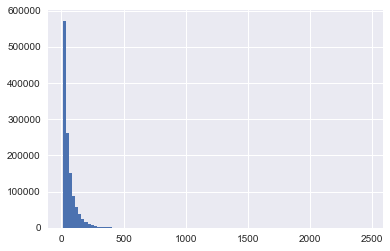

In [27]:
# ARRIVAL DELAY
plt.hist(data['ArrDelay'], bins=100)

In [28]:
data=data[(data["DepDelay"] < 100)]

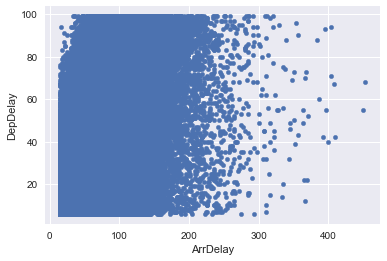

In [29]:
#Scatterplots 
data.plot(kind="scatter", x="ArrDelay", y="DepDelay")

In [30]:
#Calculate correlation matrix
corr_matrix=data.corr()

In [ ]:
corr_matrix["ArrDelay"].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.734997
NASDelay             0.555937
TaxiOut              0.438682
LateAircraftDelay    0.369384
CarrierDelay         0.213112
WeatherDelay         0.189220
TaxiIn               0.156004
ActualElapsedTime    0.146771
DepTime              0.098326
CRSArrTime           0.046179
CRSDepTime           0.040018
FlightNum            0.038599
AirTime              0.036679
CRSElapsedTime       0.022272
ArrTime              0.012094
Unnamed: 0           0.007796
Month                0.004012
Distance             0.003239
DayOfWeek            0.002371
DayofMonth           0.000704
SecurityDelay       -0.004836
Year                      NaN
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64

In [ ]:
from pandas.tools.plotting import scatter_matrix

attributes = ["ArrDelay","DepDelay", "DepTime", "ArrTime",
              "AirTime", "Distance"]
scatter_matrix(data[attributes], figsize=(12, 8))